## Notebook to select the models that perform best

Model results of wind contribution to sea level rise are compared to observations using a multitaper spectral method and the Kolmogorov-Smirnov test (as in Dangendorf).

Models are selected that for all wind models have a resulting Euclidean distance from the spectral analysis of ...cm and a KS distance below ... 



In this notebook, functions are used from: 

'/code/figures.py' 

### Import necessary methods and data

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Comparison/code')

import model_selection as ms
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Define path
path = f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/observations/Regression results/fullperiod/'
    
# Import the files
np = pd.read_csv(path+f'timeseries_NearestPoint_20cr.csv', header = [0,1,2])
tim = pd.read_csv(path+f'timeseries_Timmerman_20cr.csv', header = [0,1,2])
dang = pd.read_csv(path+f'timeseries_Dangendorf_20cr.csv', header = [0,1,2])

In [4]:
# Import detrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection()

Text(0.5, 1.0, 'Wind contribution to sea level height from 20CRv3 data')

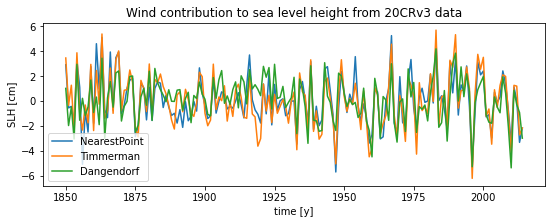

In [5]:
timeseries_20cr.plot(figsize=(9,3))
plt.ylabel('SLH [cm]')
plt.xlabel('time [y]')
plt.title('Wind contribution to sea level height from 20CRv3 data')

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

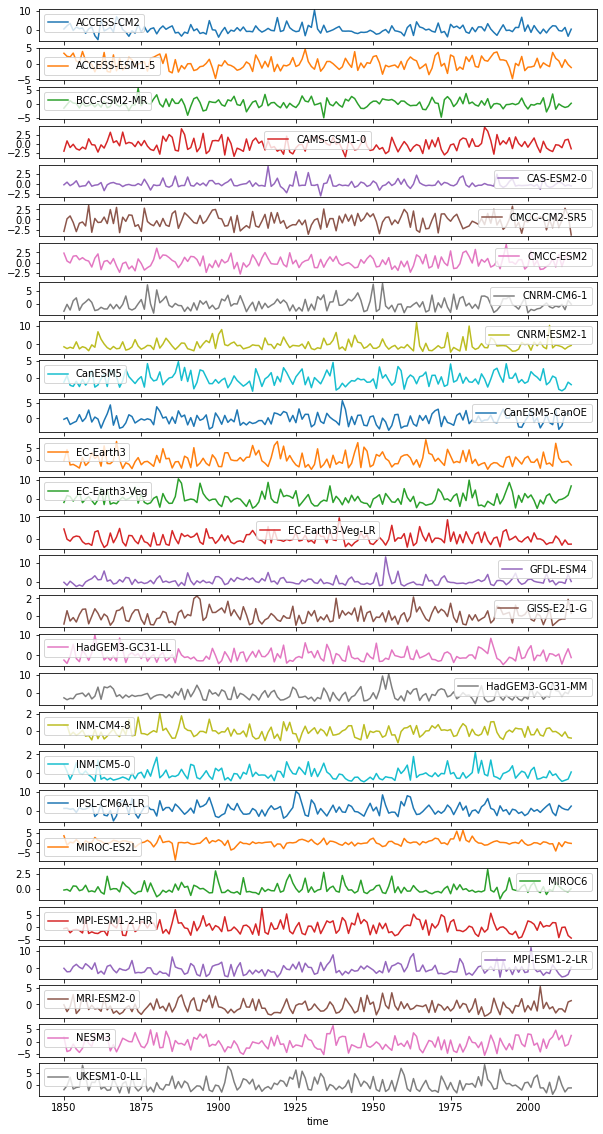

In [6]:
timeseries_cmip6['NearestPoint'].plot(subplots = True, figsize = (10,20))

### Multitaper spectral analysis

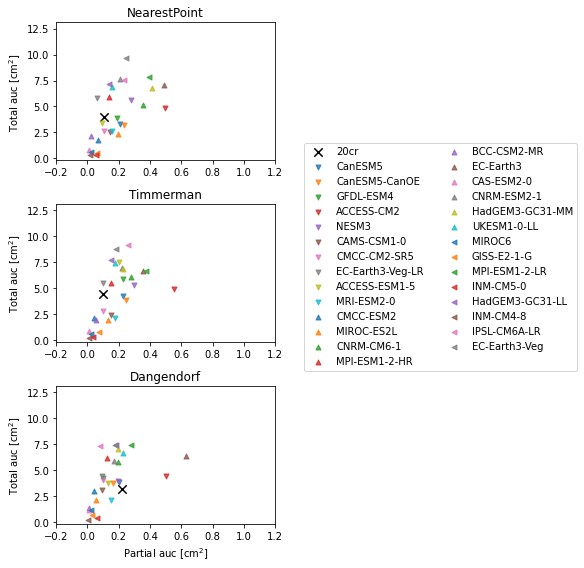

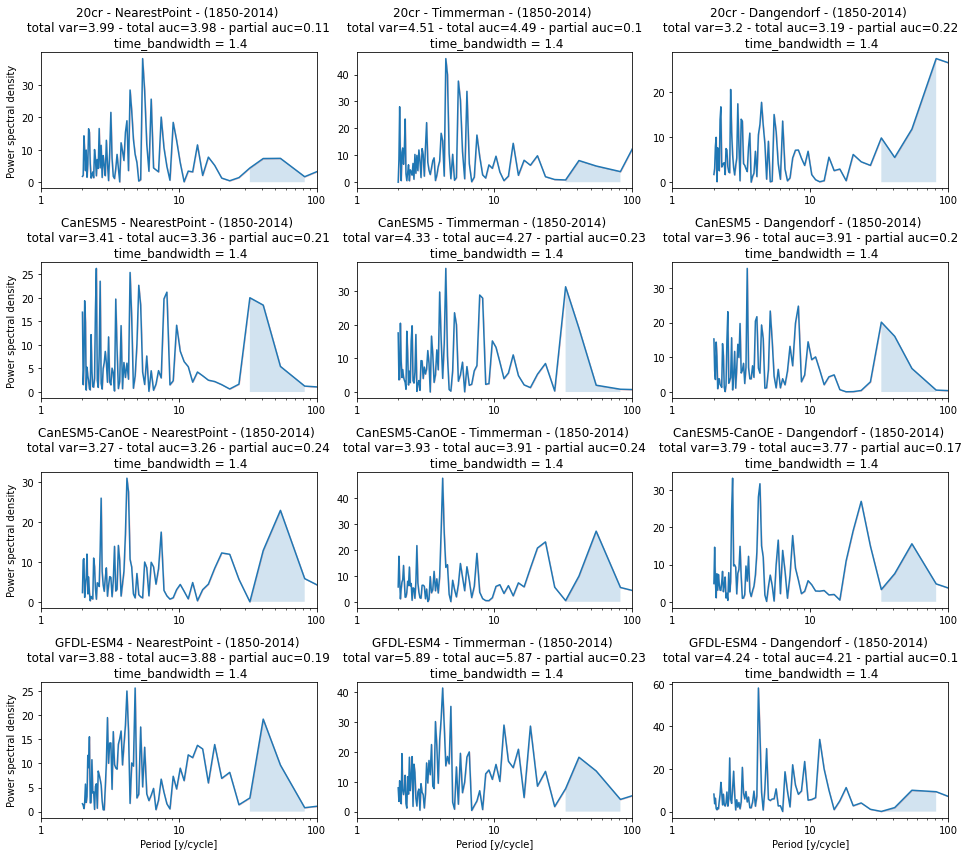

In [7]:
model_selection_spec = ms.plot_comp_20cr_cmip6(timeseries_20cr, timeseries_cmip6, n_cmip6 = 3)

In [8]:
model_selection_spec

,NearestPoint,Timmerman,Dangendorf,Average
model,,,,
CanESM5,0.629379,0.253875,0.721293,0.534849
CanESM5-CanOE,0.727293,0.603735,0.585666,0.638898
GFDL-ESM4,0.128038,1.380186,1.029276,0.845833
ACCESS-CM2,0.958509,0.618789,1.313377,0.963558
NESM3,1.675101,0.870418,0.791843,1.112454
CAMS-CSM1-0,1.451858,2.077669,0.148302,1.225943
CMCC-CM2-SR5,1.361404,1.634111,0.898196,1.297903
EC-Earth3-Veg-LR,1.832446,1.019433,1.238011,1.363297
ACCESS-ESM1-5,0.53473,3.064921,0.569065,1.389572


### Kolmogorov Smirnov test


Answers the question: What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?


Quantifies a distance between the empirical distribution functions of two samples

Large distances between both cumulative distributions indicate inconsistencies between the observed and modeled data 

In [9]:
model_selection_ks = ms.ks_test_df(timeseries_20cr, timeseries_cmip6)

In [10]:
best_models = ['CanESM5-CanOE', 'GFDL-ESM4', 'ACCESS-CM2', 'CAMS-CSM1-0', 'CMCC-CM2-SR5', 'EC-Earth3-Veg-LR', 'ACCESS-ESM1-5',
'CMCC-ESM2', 'CNRM-CM6-1', 'MPI-ESM1-2-HR', 'CanESM5', 'NESM3', 'BCC-CSM2-MR', 'MIROC-ES2L']

In [11]:
['IPSL-CM6A-LR', 'UKESM1-0-LL', 'EC-Earth3-Veg', 'BCC-CSM2-MR']

['IPSL-CM6A-LR', 'UKESM1-0-LL', 'EC-Earth3-Veg', 'BCC-CSM2-MR']

In [12]:
['CanESM5', 'NESM3', 'MRI-ESM2-0', 'MIROC-ES2L']

['CanESM5', 'NESM3', 'MRI-ESM2-0', 'MIROC-ES2L']

In [13]:
model_selection_spec

,NearestPoint,Timmerman,Dangendorf,Average
model,,,,
CanESM5,0.629379,0.253875,0.721293,0.534849
CanESM5-CanOE,0.727293,0.603735,0.585666,0.638898
GFDL-ESM4,0.128038,1.380186,1.029276,0.845833
ACCESS-CM2,0.958509,0.618789,1.313377,0.963558
NESM3,1.675101,0.870418,0.791843,1.112454
CAMS-CSM1-0,1.451858,2.077669,0.148302,1.225943
CMCC-CM2-SR5,1.361404,1.634111,0.898196,1.297903
EC-Earth3-Veg-LR,1.832446,1.019433,1.238011,1.363297
ACCESS-ESM1-5,0.53473,3.064921,0.569065,1.389572


In [14]:
model_selection_ks

D$_{ks}$                                     p-value  \
                 NearestPoint Timmerman Dangendorf   Average NearestPoint   
model                                                                       
ACCESS-ESM1-5        0.054545  0.090909   0.060606  0.068687      0.96761   
ACCESS-CM2           0.060606  0.078788   0.078788  0.072727     0.923572   
EC-Earth3-Veg-LR     0.090909  0.078788   0.109091  0.092929     0.504185   
CAMS-CSM1-0          0.090909  0.133333   0.109091  0.111111     0.504185   
CanESM5-CanOE        0.109091  0.084848   0.163636  0.119192     0.280527   
MPI-ESM1-2-HR        0.133333   0.09697   0.145455  0.125253     0.106445   
GFDL-ESM4             0.10303   0.09697   0.193939  0.131313     0.346029   
CMCC-ESM2            0.127273  0.127273   0.145455  0.133333     0.138208   
IPSL-CM6A-LR         0.151515  0.127273   0.145455  0.141414     0.045149   
UKESM1-0-LL          0.157576  0.109091   0.175758  0.147475     0.033094   
EC-Earth3-Veg        0.181818  0.145455   0.127273  0.151515     0.008437   
BCC-CSM2-MR          0.145455  0.133333   0.175758  0.151515     0.060839   
CMCC-CM2-SR5         0.109091  0.175758   0.206061  0.163636     0.280527   
CNRM-CM6-1           0.151515  0.151515   0.193939  0.165657     0.045149   
EC-Earth3            0.145455  0.133333   0.224242  0.167677     0.060839   
HadGEM3-GC31-LL      0.169697  0.181818   0.187879  0.179798     0.017131   
MIROC-ES2L           0.169697  0.248485   0.133333  0.183838     0.017131   
CanESM5              0.133333  0.139394   0.290909  0.187879     0.106445   
NESM3                0.218182  0.224242   0.187879  0.210101     0.000746   
MRI-ESM2-0           0.206061  0.218182   0.206061  0.210101     0.001761   
MPI-ESM1-2-LR        0.248485  0.206061   0.236364  0.230303      0.00007   
GISS-E2-1-G          0.284848  0.248485        0.2  0.244444     0.000003   
CAS-ESM2-0            0.30303   0.29697   0.157576  0.252525          0.0   
MIROC6               0.309091  0.327273   0.151515  0.262626          0.0   
CNRM-ESM2-1          0.254545  0.236364   0.321212  0.270707     0.000042   
HadGEM3-GC31-MM      0.290909   0.29697   0.290909  0.292929     0.000001   
INM-CM5-0            0.333333  0.363636   0.260606  0.319192          0.0   
INM-CM4-8            0.290909  0.345455   0.351515  0.329293     0.000001   

                                                     
                 Timmerman Dangendorf       Average  
model                                                
ACCESS-ESM1-5     0.504185   0.923572  7.984555e-01  
ACCESS-CM2          0.6867     0.6867  7.656571e-01  
EC-Earth3-Veg-LR    0.6867   0.280527  4.904705e-01  
CAMS-CSM1-0       0.106445   0.280527  2.970523e-01  
CanESM5-CanOE     0.593973   0.023959  2.994864e-01  
MPI-ESM1-2-HR     0.420866   0.060839  1.960501e-01  
GFDL-ESM4         0.420866   0.003953  2.569496e-01  
CMCC-ESM2         0.138208   0.060839  1.124181e-01  
IPSL-CM6A-LR      0.138208   0.060839  8.139860e-02  
UKESM1-0-LL       0.280527   0.012098  1.085729e-01  
EC-Earth3-Veg     0.060839   0.138208  6.916129e-02  
BCC-CSM2-MR       0.106445   0.012098  5.979385e-02  
CMCC-CM2-SR5      0.012098   0.001761  9.812872e-02  
CNRM-CM6-1        0.045149   0.003953  3.141720e-02  
EC-Earth3         0.106445   0.000476  5.592010e-02  
HadGEM3-GC31-LL   0.008437   0.005811  1.045999e-02  
MIROC-ES2L         0.00007   0.106445  4.121536e-02  
CanESM5           0.080973   0.000001  6.247308e-02  
NESM3             0.000476   0.005811  2.344702e-03  
MRI-ESM2-0        0.000746   0.001761  1.422910e-03  
MPI-ESM1-2-LR     0.001761   0.000187  6.726998e-04  
GISS-E2-1-G        0.00007   0.002655  9.092327e-04  
CAS-ESM2-0        0.000001   0.033094  1.103172e-02  
MIROC6                 0.0   0.045149  1.504986e-02  
CNRM-ESM2-1       0.000187        0.0  7.629884e-05  
HadGEM3-GC31-MM   0.000001   0.000001  1.247821e-06  
INM-CM5-0              0.0   0.000025  8.242715e-06  
INM-CM4-8    

In [15]:
model_selection_ks[:14]

D$_{ks}$                                     p-value  \
                 NearestPoint Timmerman Dangendorf   Average NearestPoint   
model                                                                       
ACCESS-ESM1-5        0.054545  0.090909   0.060606  0.068687      0.96761   
ACCESS-CM2           0.060606  0.078788   0.078788  0.072727     0.923572   
EC-Earth3-Veg-LR     0.090909  0.078788   0.109091  0.092929     0.504185   
CAMS-CSM1-0          0.090909  0.133333   0.109091  0.111111     0.504185   
CanESM5-CanOE        0.109091  0.084848   0.163636  0.119192     0.280527   
MPI-ESM1-2-HR        0.133333   0.09697   0.145455  0.125253     0.106445   
GFDL-ESM4             0.10303   0.09697   0.193939  0.131313     0.346029   
CMCC-ESM2            0.127273  0.127273   0.145455  0.133333     0.138208   
IPSL-CM6A-LR         0.151515  0.127273   0.145455  0.141414     0.045149   
UKESM1-0-LL          0.157576  0.109091   0.175758  0.147475     0.033094   
EC-Earth3-Veg        0.181818  0.145455   0.127273  0.151515     0.008437   
BCC-CSM2-MR          0.145455  0.133333   0.175758  0.151515     0.060839   
CMCC-CM2-SR5         0.109091  0.175758   0.206061  0.163636     0.280527   
CNRM-CM6-1           0.151515  0.151515   0.193939  0.165657     0.045149   

                                                 
                 Timmerman Dangendorf   Average  
model                                            
ACCESS-ESM1-5     0.504185   0.923572  0.798455  
ACCESS-CM2          0.6867     0.6867  0.765657  
EC-Earth3-Veg-LR    0.6867   0.280527  0.490470  
CAMS-CSM1-0       0.106445   0.280527  0.297052  
CanESM5-CanOE     0.593973   0.023959  0.299486  
MPI-ESM1-2-HR     0.420866   0.060839  0.196050  
GFDL-ESM4         0.420866   0.003953  0.256950  
CMCC-ESM2         0.138208   0.060839  0.112418  
IPSL-CM6A-LR      0.138208   0.060839  0.081399  
UKESM1-0-LL       0.280527   0.012098  0.108573  
EC-Earth3-Veg     0.060839   0.138208  0.069161  
BCC-CSM2-MR       0.106445   0.012098  0.059794  
CMCC-CM2-SR5      0.012098   0.001761  0.098129  
CNRM-CM6-1        0.045149   0.003953  0.031417

### Model selection

Select models whereof all windmodels have a smaller euclidean distance than 2.5 and a smaller ks distance than 0.25

In [16]:
best_models = ms.select_models(model_selection_spec, model_selection_ks)

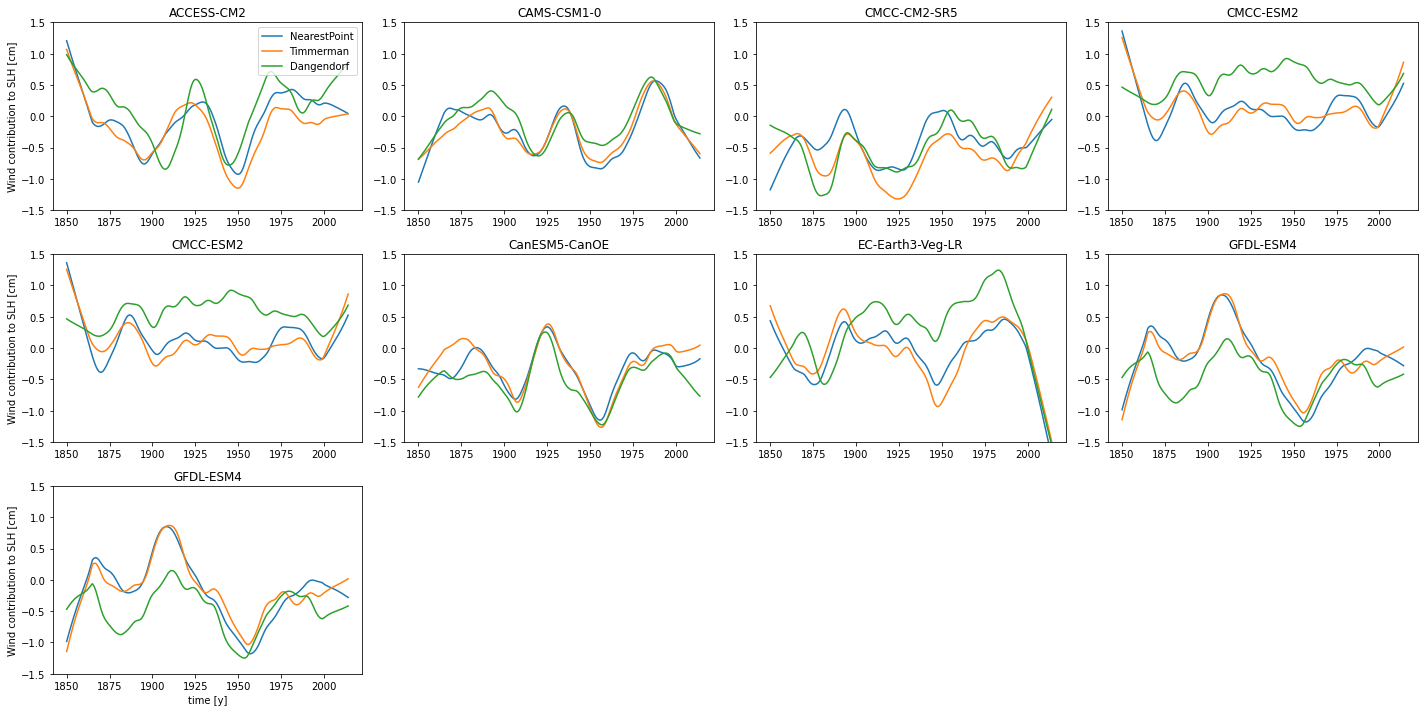

In [17]:
ms.plot_best_models(best_models, timeseries_cmip6)

#### Again plot the best models

In [18]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']

In [19]:
best_models2 = ['CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CNRM-CM6-1', 
               'GFDL-ESM4', 'MIROC-ES2L']

In [20]:
timeseries = timeseries_cmip6.swaplevel(0,1, axis=1)
timeseries = timeseries[best_models]

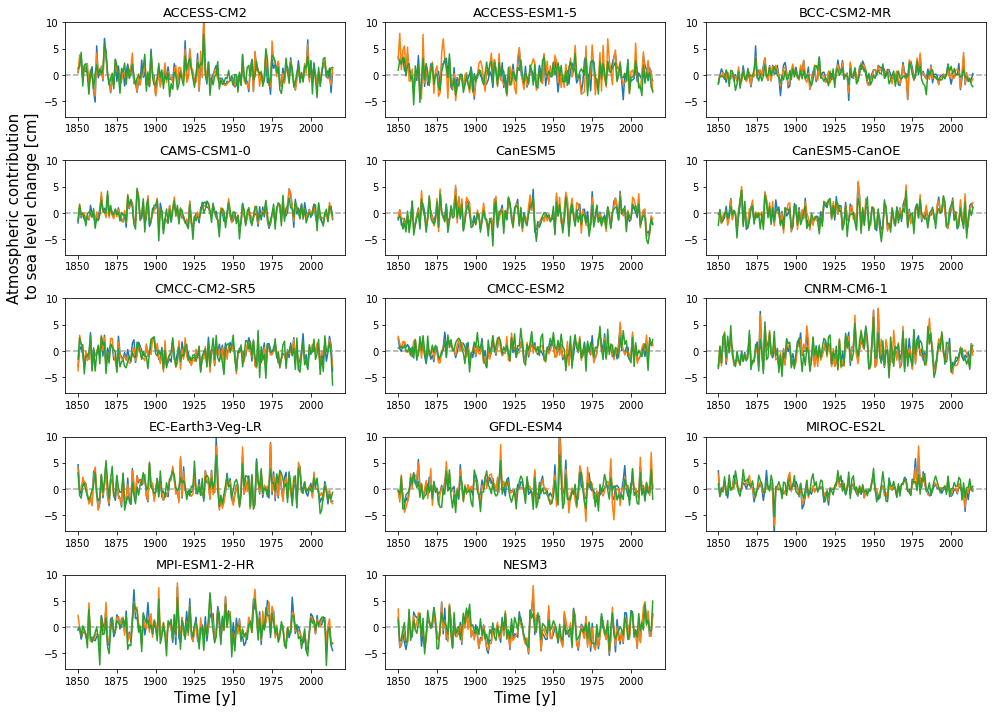

In [21]:
import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

n_col = 3
n_row = math.ceil(len(best_models) / n_col)
n_delete = len(best_models) % n_col

frac = window / timeseries.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 2*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        if i == n_row-1 and j in range(n_delete, n_col):
            fig.delaxes(axs[i,j])
            
        else:
        
            ax.axhline(color='darkgray', linestyle='--')

            for wm in labels_windmodel:
                ax.plot(timeseries[best_models[n_col*i+j], wm].index, timeseries[best_models[n_col*i+j], wm])
            ax.set_title(best_models[n_col*i+j], fontsize = 13)
            ax.set_ylim(-8,10)
            if i == n_row-1:
                ax.set_xlabel('Time [y]', fontsize = fsize)
            if j == 0 and i == 1:
                ax.set_ylabel('Atmospheric contribution\n to sea level change [cm]', fontsize = fsize)
                #ax.legend(labels = labels_windmodel, fontsize = 12)
            plt.tight_layout()


            
            
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/atmospheric_contribution_best_models2', 
            bbox_inches = 'tight')

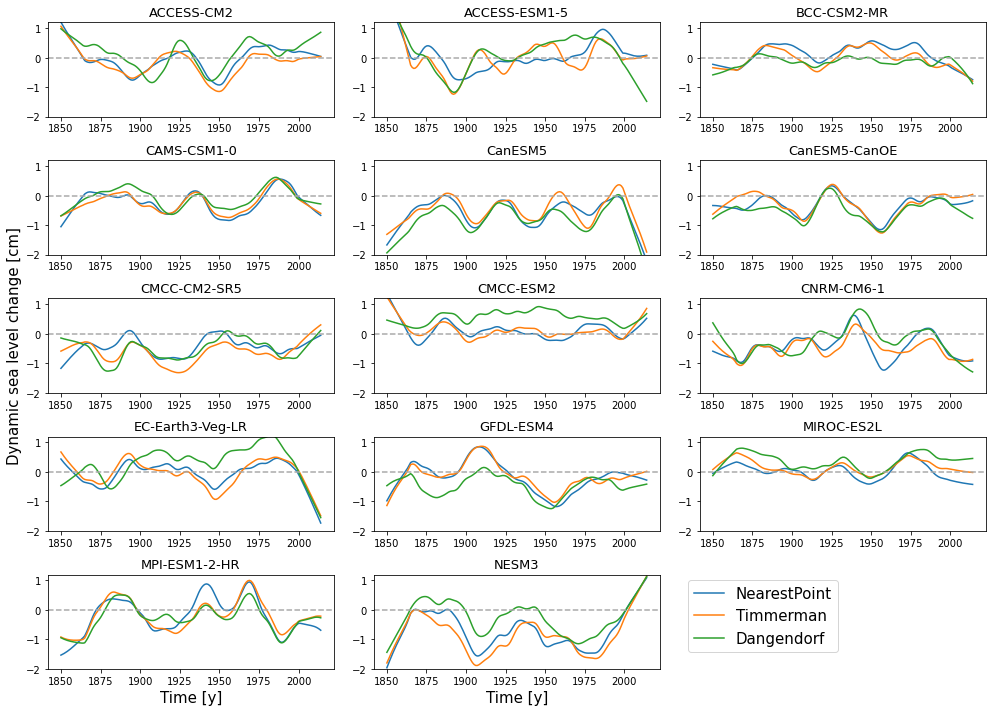

In [22]:
import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

n_col = 3
n_row = math.ceil(len(best_models) / n_col)
n_delete = len(best_models) % n_col

frac = window / timeseries.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 2*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        if i == n_row-1 and j in range(n_delete, n_col):
            fig.delaxes(axs[i,j])
            
        else:
        
            
            for wm in labels_windmodel:
                data = timeseries[best_models[n_col*i+j], wm]
                lws = lowess(data.values, 
                                data.index.values,
                                frac, 
                                return_sorted = False)
                ax.plot(data.index, lws)
            ax.set_title(best_models[n_col*i+j], fontsize = 13)
            ax.set_ylim(-2.0,1.2)
            if i == n_row-1:
                ax.set_xlabel('Time [y]', fontsize = fsize)
            if j == 0 and i == 2:
                ax.set_ylabel('Dynamic sea level change [cm]', fontsize = fsize)
            plt.tight_layout()
            ax.axhline(color='darkgray', linestyle='--')
        
plt.legend(labels = labels_windmodel, loc='lower right', bbox_to_anchor = (1.65,0.1), fontsize = fsize)
            
            
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/atmospheric_contribution_best_models_31', 
            bbox_inches = 'tight', dpi = 500)
            

In [23]:
timeseries_cmip6 = timeseries

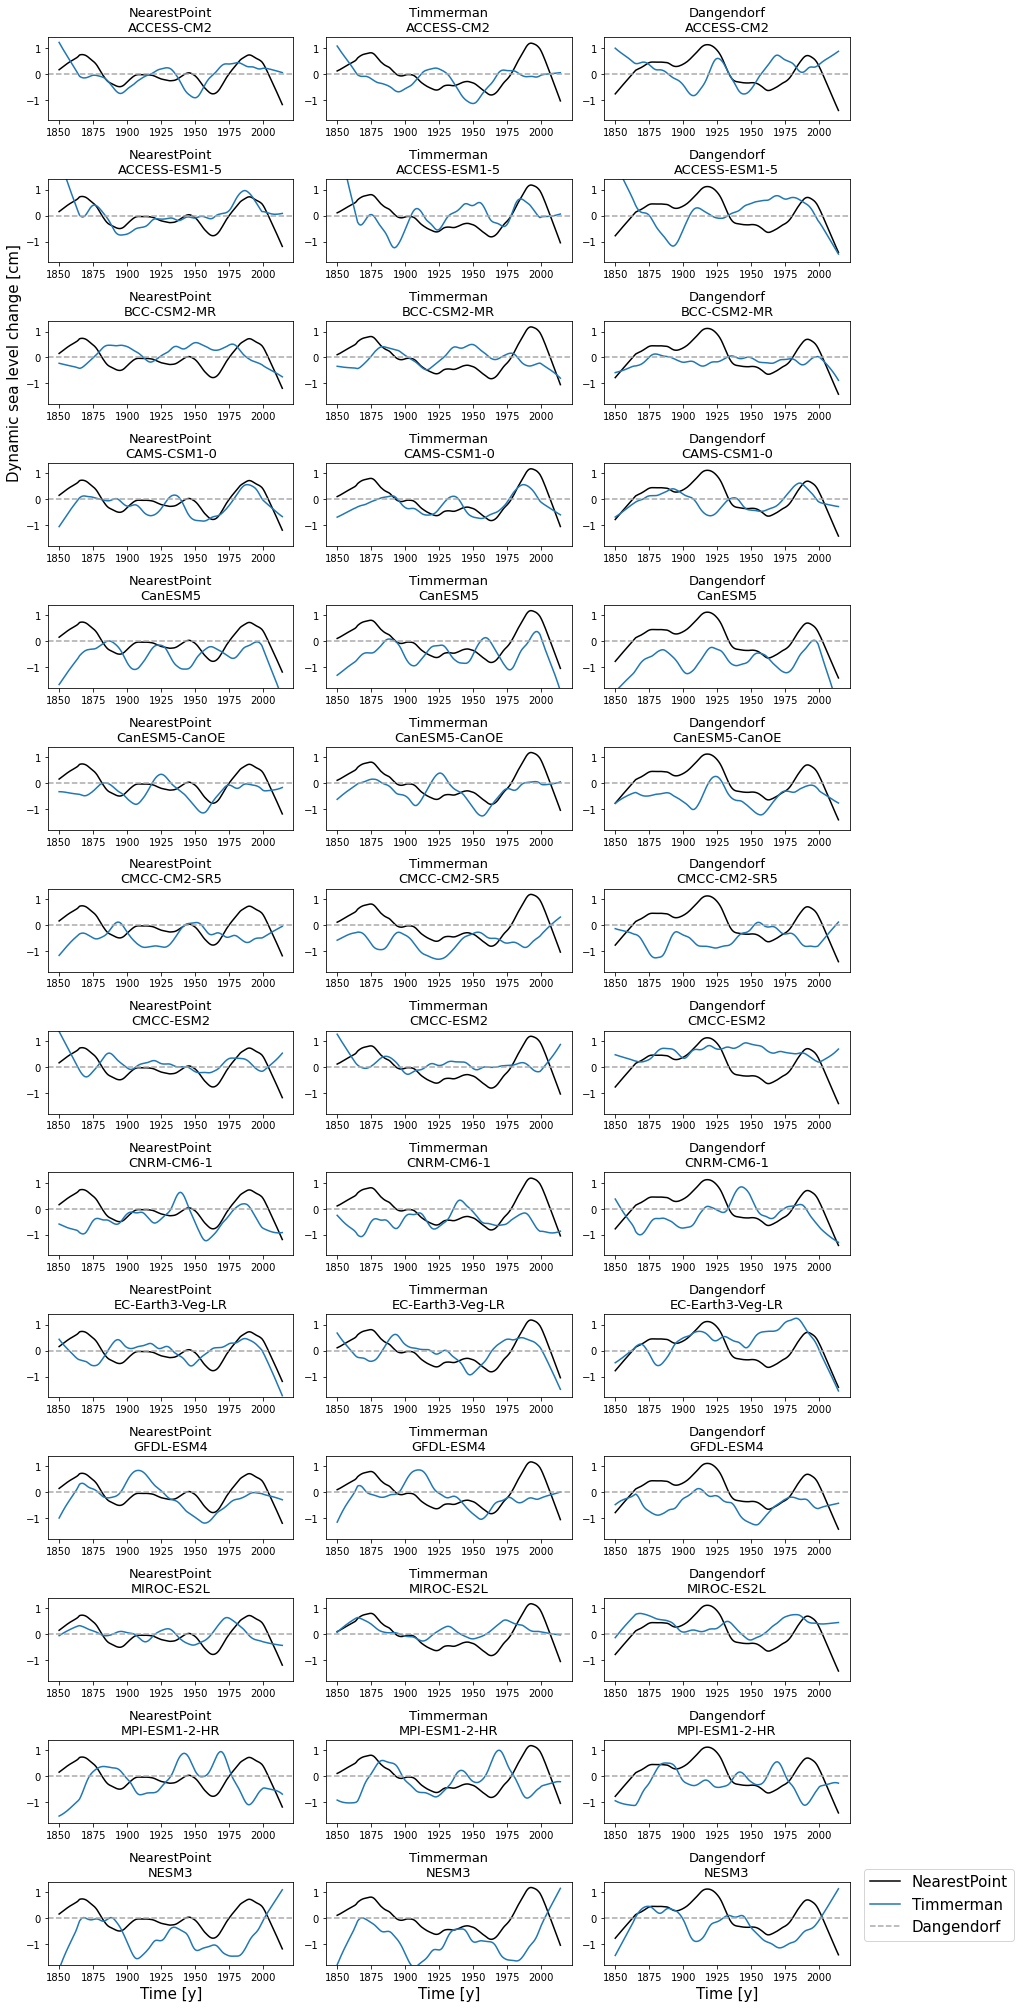

In [24]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']


# Import detrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection()
timeseries_cmip6 = timeseries_cmip6.swaplevel(0,1, axis=1)
timeseries_cmip6 = timeseries_cmip6[best_models]


import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

n_col = 3
n_row = len(best_models)

frac = window / timeseries_cmip6.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(12, 2*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        
        
        data_20cr = timeseries_20cr[labels_windmodel[j]]
        lws_20cr = lowess(data_20cr.values, 
                           data_20cr.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_20cr.index, lws_20cr, color = 'k')
        
        data_cmip6 = timeseries_cmip6[best_models[i], labels_windmodel[j]]
        lws_cmip6 = lowess(data_cmip6.values, 
                           data_cmip6.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_cmip6.index, lws_cmip6)
        ax.set_title(labels_windmodel[j] + '\n' +best_models[i], fontsize = 13)
        ax.set_ylim(-1.8,1.4)
        if i == n_row-1:
            ax.set_xlabel('Time [y]', fontsize = fsize)
        if j == 0 and i == 2:
            ax.set_ylabel('Dynamic sea level change [cm]', fontsize = fsize)
        plt.tight_layout()
        ax.axhline(color='darkgray', linestyle='--')
        
plt.legend(labels = labels_windmodel, loc='lower right', bbox_to_anchor = (1.7,0.2), fontsize = fsize)
            
            
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/atmospheric_contribution_best_models_31', 
            bbox_inches = 'tight', dpi = 500)

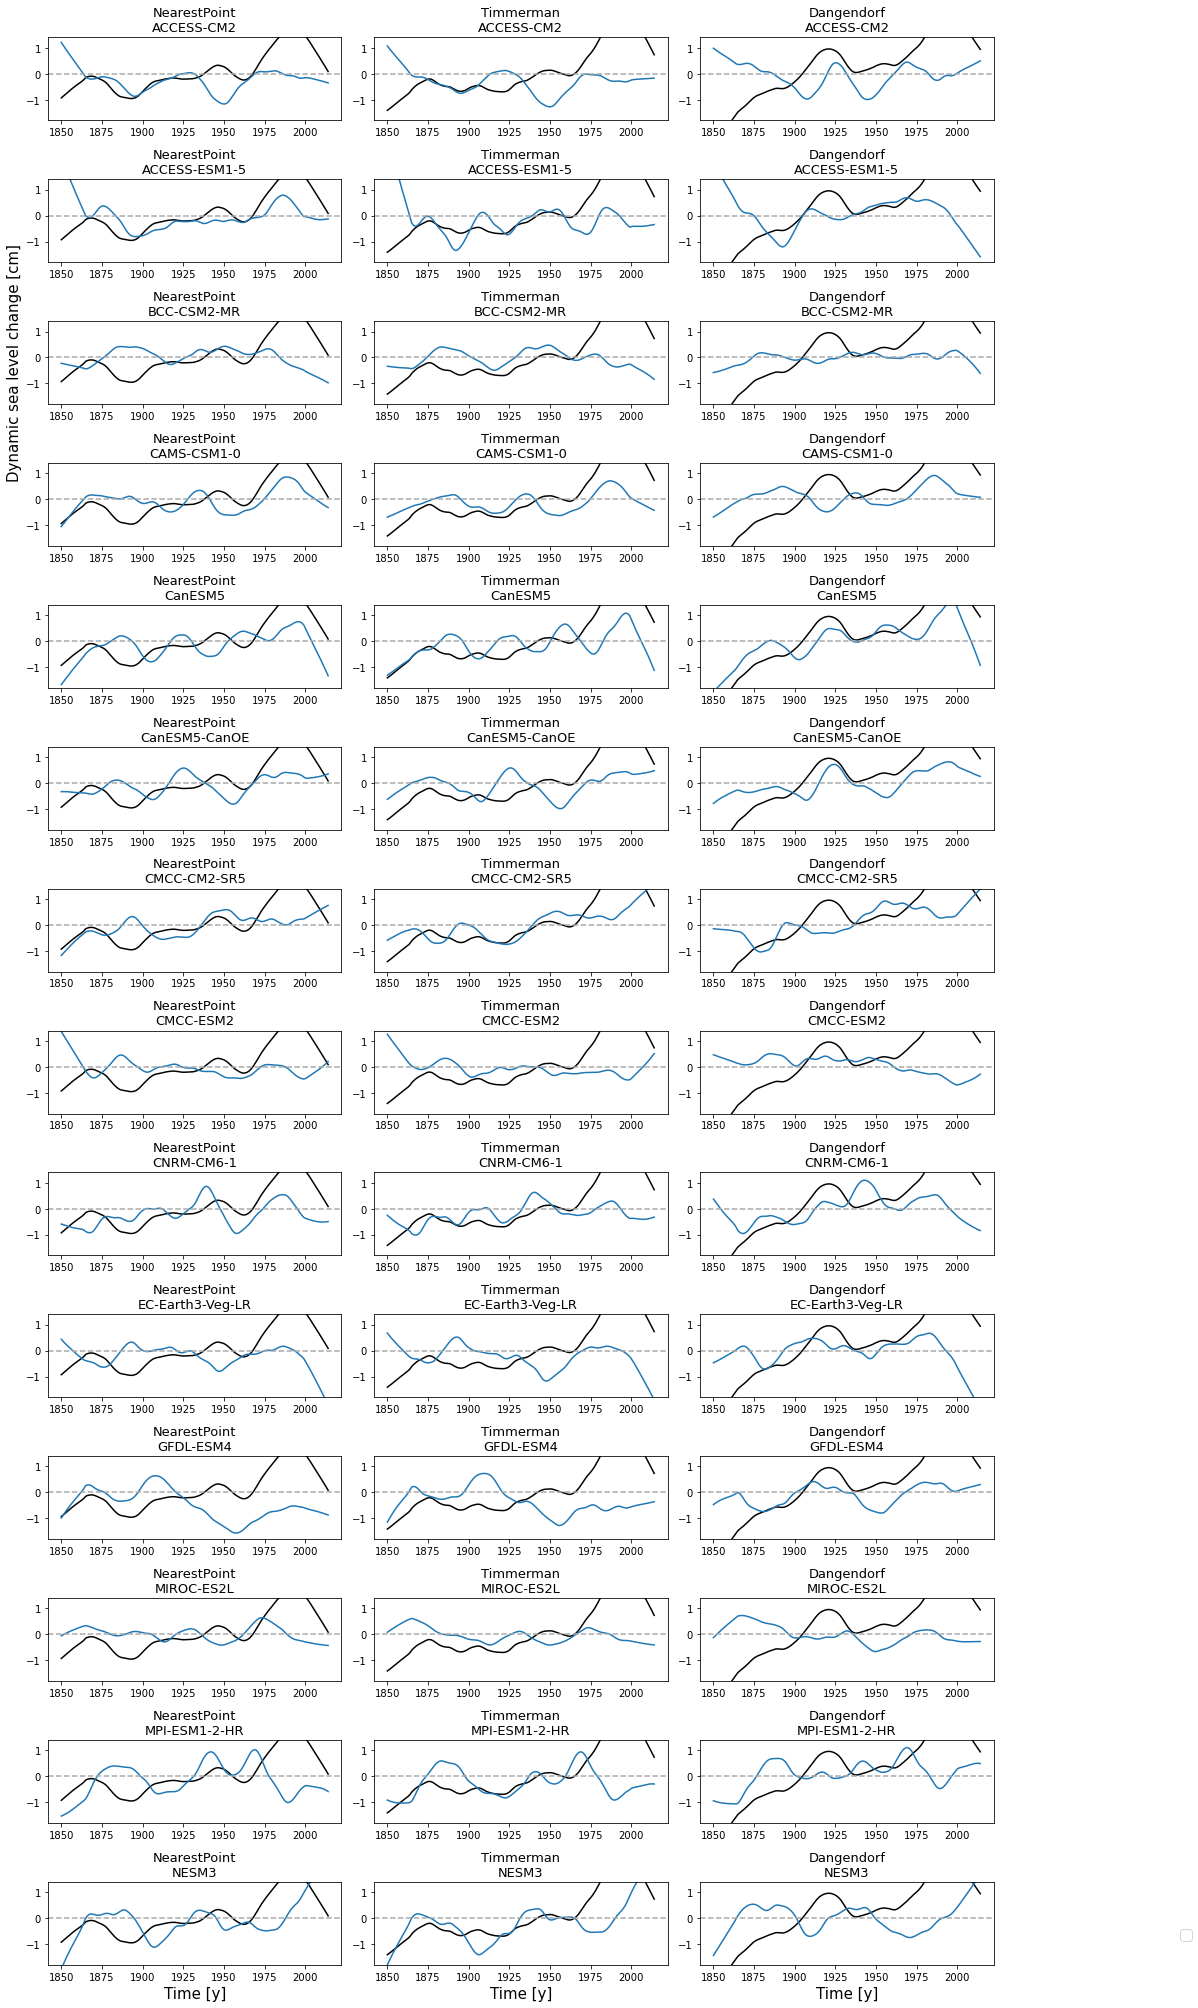

In [25]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']


# Import nondetrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection2()
timeseries_cmip6 = timeseries_cmip6.swaplevel(0,1, axis=1)
timeseries_cmip6 = timeseries_cmip6[best_models]


import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

n_col = 3
n_row = len(best_models)

frac = window / timeseries_cmip6.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 2*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        
        
        data_20cr = timeseries_20cr[labels_windmodel[j]]
        lws_20cr = lowess(data_20cr.values, 
                           data_20cr.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_20cr.index, lws_20cr, color = 'k')
        
        data_cmip6 = timeseries_cmip6[best_models[i], labels_windmodel[j]]
        lws_cmip6 = lowess(data_cmip6.values, 
                           data_cmip6.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_cmip6.index, lws_cmip6)
        ax.set_title(labels_windmodel[j] + '\n' +best_models[i], fontsize = 13)
        ax.set_ylim(-1.8,1.4)
        if i == n_row-1:
            ax.set_xlabel('Time [y]', fontsize = fsize)
        if j == 0 and i == 2:
            ax.set_ylabel('Dynamic sea level change [cm]', fontsize = fsize)
        plt.tight_layout()
        ax.axhline(color='darkgray', linestyle='--')
        
plt.legend(labels = [], loc='lower right', bbox_to_anchor = (1.7,0.2), fontsize = fsize)
            
            
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/atmospheric_contribution_best_models_31', 
            bbox_inches = 'tight', dpi = 500)

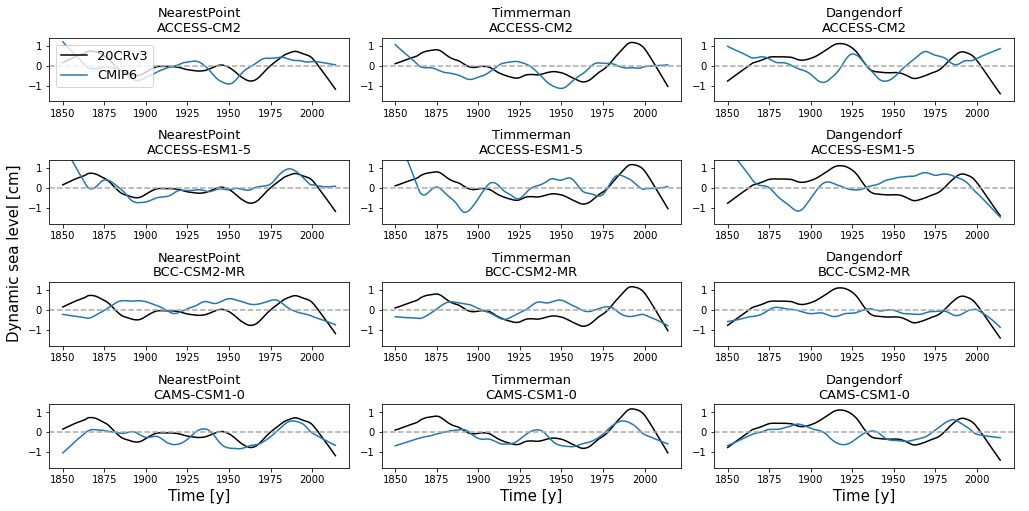

In [38]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0']


# Import detrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection()
timeseries_cmip6 = timeseries_cmip6.swaplevel(0,1, axis=1)
timeseries_cmip6 = timeseries_cmip6[best_models]


import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

n_col = 3
n_row = len(best_models)

frac = window / timeseries_cmip6.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 1.8*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        
        
        data_20cr = timeseries_20cr[labels_windmodel[j]]
        lws_20cr = lowess(data_20cr.values, 
                           data_20cr.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_20cr.index, lws_20cr, color = 'k')
        
        data_cmip6 = timeseries_cmip6[best_models[i], labels_windmodel[j]]
        lws_cmip6 = lowess(data_cmip6.values, 
                           data_cmip6.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_cmip6.index, lws_cmip6)
        ax.set_title(labels_windmodel[j] + '\n' +best_models[i], fontsize = 13)
        ax.set_ylim(-1.8,1.4)
        if i == n_row-1:
            ax.set_xlabel('Time [y]', fontsize = fsize)
        #if j == 0 and i == 2:
        #    ax.set_ylabel('Dynamic sea level change [cm]', fontsize = fsize)
        plt.tight_layout()
        ax.axhline(color='darkgray', linestyle='--')
        
        if i == 0 and j==0:
            ax.legend(labels = ['20CRv3', 'CMIP6'], loc='upper left', fontsize = 13)
            
# Adding a plot in the figure which will encapsulate all the subplots with axis showing only
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.ylabel('Dynamic sea level [cm]', fontsize = fsize)      
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/Appendix/wind_influence_cmip6_20cr_best_models1', 
            bbox_inches = 'tight', dpi = 500)

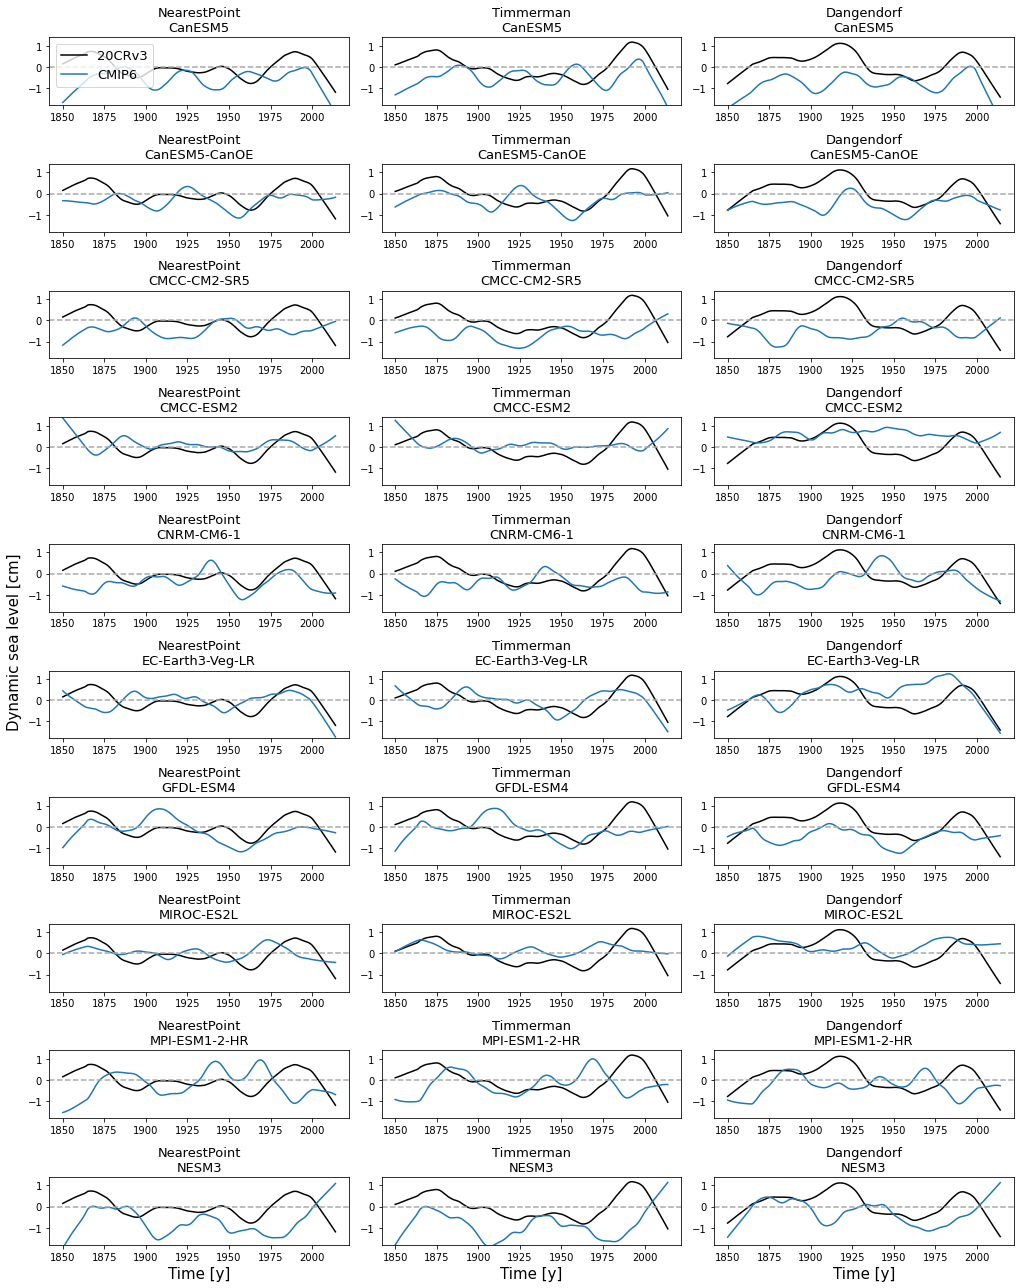

In [37]:
best_models = ['CanESM5', 'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'NESM3']


# Import detrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection()
timeseries_cmip6 = timeseries_cmip6.swaplevel(0,1, axis=1)
timeseries_cmip6 = timeseries_cmip6[best_models]


import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

n_col = 3
n_row = len(best_models)

frac = window / timeseries_cmip6.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 1.8*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        
        
        data_20cr = timeseries_20cr[labels_windmodel[j]]
        lws_20cr = lowess(data_20cr.values, 
                           data_20cr.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_20cr.index, lws_20cr, color = 'k')
        
        data_cmip6 = timeseries_cmip6[best_models[i], labels_windmodel[j]]
        lws_cmip6 = lowess(data_cmip6.values, 
                           data_cmip6.index.values,
                           frac,
                           return_sorted = False)
        ax.plot(data_cmip6.index, lws_cmip6)
        ax.set_title(labels_windmodel[j] + '\n' +best_models[i], fontsize = 13)
        ax.set_ylim(-1.8,1.4)
        if i == n_row-1:
            ax.set_xlabel('Time [y]', fontsize = fsize)
        #if j == 0 and i == 2:
        #    ax.set_ylabel('Dynamic sea level change [cm]', fontsize = fsize)
        plt.tight_layout()
        ax.axhline(color='darkgray', linestyle='--')
        
        if i == 0 and j==0:
            ax.legend(labels = ['20CRv3', 'CMIP6'], loc='upper left', fontsize = 13)
            
# Adding a plot in the figure which will encapsulate all the subplots with axis showing only
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.ylabel('Dynamic sea level [cm]', fontsize = fsize)      
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/Appendix/wind_influence_cmip6_20cr_best_models2', 
            bbox_inches = 'tight', dpi = 500)

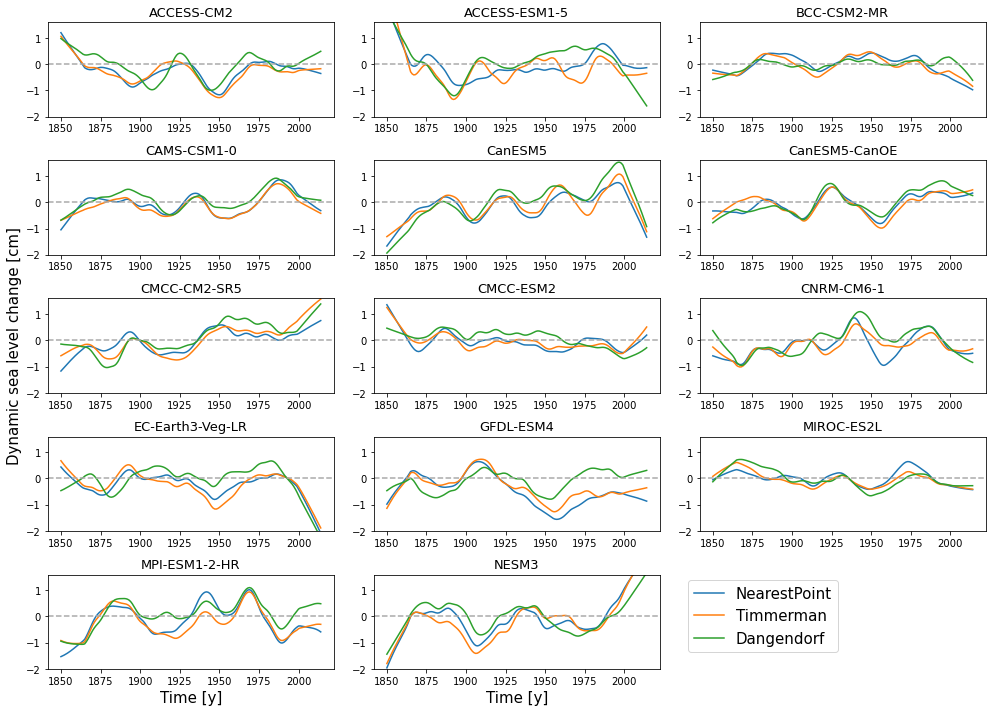

In [28]:
import math
window = 31
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
fsize = 15

best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']


# Import nondetrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection2()
timeseries_cmip6 = timeseries_cmip6.swaplevel(0,1, axis=1)
timeseries = timeseries_cmip6[best_models]



n_col = 3
n_row = math.ceil(len(best_models) / n_col)
n_delete = len(best_models) % n_col

frac = window / timeseries.index.size

fig, axs = plt.subplots(n_row, n_col, figsize=(14, 2*n_row))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]
        
        if i == n_row-1 and j in range(n_delete, n_col):
            fig.delaxes(axs[i,j])
            
        else:
        
            
            for wm in labels_windmodel:
                data = timeseries[best_models[n_col*i+j], wm]
                lws = lowess(data.values, 
                                data.index.values,
                                frac, 
                                return_sorted = False)
                ax.plot(data.index, lws)
            ax.set_title(best_models[n_col*i+j], fontsize = 13)
            ax.set_ylim(-2.0,1.6)
            if i == n_row-1:
                ax.set_xlabel('Time [y]', fontsize = fsize)
            if j == 0 and i == 2:
                ax.set_ylabel('Dynamic sea level change [cm]', fontsize = fsize)
            plt.tight_layout()
            ax.axhline(color='darkgray', linestyle='--')
        
plt.legend(labels = labels_windmodel, loc='lower right', bbox_to_anchor = (1.65,0.1), fontsize = fsize)
            
            
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/atmospheric_contribution_best_models_31', 
            bbox_inches = 'tight', dpi = 500)

#### Obtain trends over the historical period

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import linregress


lst = []
for model in best_models:
    trends_df = pd.DataFrame({'quantity': ['linear trend', 'std']})
    trends_df = trends_df.set_index('quantity')
    trends_df[model] = ''
    lst.append(trends_df)
    
trend_df = pd.concat(lst, axis=1)
trend_df = pd.concat([trend_df, trend_df, trend_df], axis=1, keys = ['NearestPoint', 'Timmerman', 'Dangendorf'])

for column in trend_df:
    trend_df[column]['linear trend'] = linregress(timeseries.index.values,timeseries[column[1], column[0]].values).slope * 10
    trend_df[column]['std'] = linregress(timeseries.index.values,timeseries[column[1], column[0]].values).stderr * 10

In [30]:
trend_df

NearestPoint                                                  \
               ACCESS-CM2 ACCESS-ESM1-5 BCC-CSM2-MR CAMS-CSM1-0   CanESM5   
quantity                                                                    
linear trend    -0.024121     -0.013024    -0.01406    0.021238  0.053379   
std              0.036205      0.030526     0.02439    0.026062  0.030264   

                                                                               \
             CanESM5-CanOE CMCC-CM2-SR5 CMCC-ESM2 CNRM-CM6-1 EC-Earth3-Veg-LR   
quantity                                                                        
linear trend      0.032096     0.049143 -0.019751   0.025943        -0.021657   
std               0.029636     0.026577   0.02197   0.037198         0.040134   

              ... Dangendorf                                                  \
              ...    CanESM5 CanESM5-CanOE CMCC-CM2-SR5 CMCC-ESM2 CNRM-CM6-1   
quantity      ...                                                              
linear trend  ...   0.102317      0.062474     0.077966 -0.058942   0.027546   
std           ...   0.032609        0.0319     0.033146  0.028422   0.039608   

                                                                            
             EC-Earth3-Veg-LR GFDL-ESM4 MIROC-ES2L MPI-ESM1-2-HR     NESM3  
quantity                                                                    
linear trend        -0.043472  0.044044  -0.044716      0.045991  0.033082  
std                  0.034644  0.033739   0.024257      0.040787  0.032938  

[2 rows x 42 columns]

### Plot of the 39 year trends of atmospheric contribution of climate models

In [31]:
import numpy as np
from scipy.stats import linregress

def get_decadal_trends_stds(data, time_period):
    """
    Function to obtain lists of years, trends and standard errors
    time_period should be an odd number
    
    """
    y0 = data.index[0] + time_period//2
    yend = data.index[-1] - time_period//2
    years = np.arange(y0, yend)
    starting_years = np.arange(data.index[0], data.index[-1]-time_period + 1)
    trends = []
    stds = []
    
    for yr in starting_years:
        time = np.arange(yr, yr+time_period)
        y = data.loc[yr:yr+time_period-1].values
        trends.append(linregress(time,y).slope*10)
        stds.append(linregress(time,y).stderr*10)
        
    return years, trends, stds

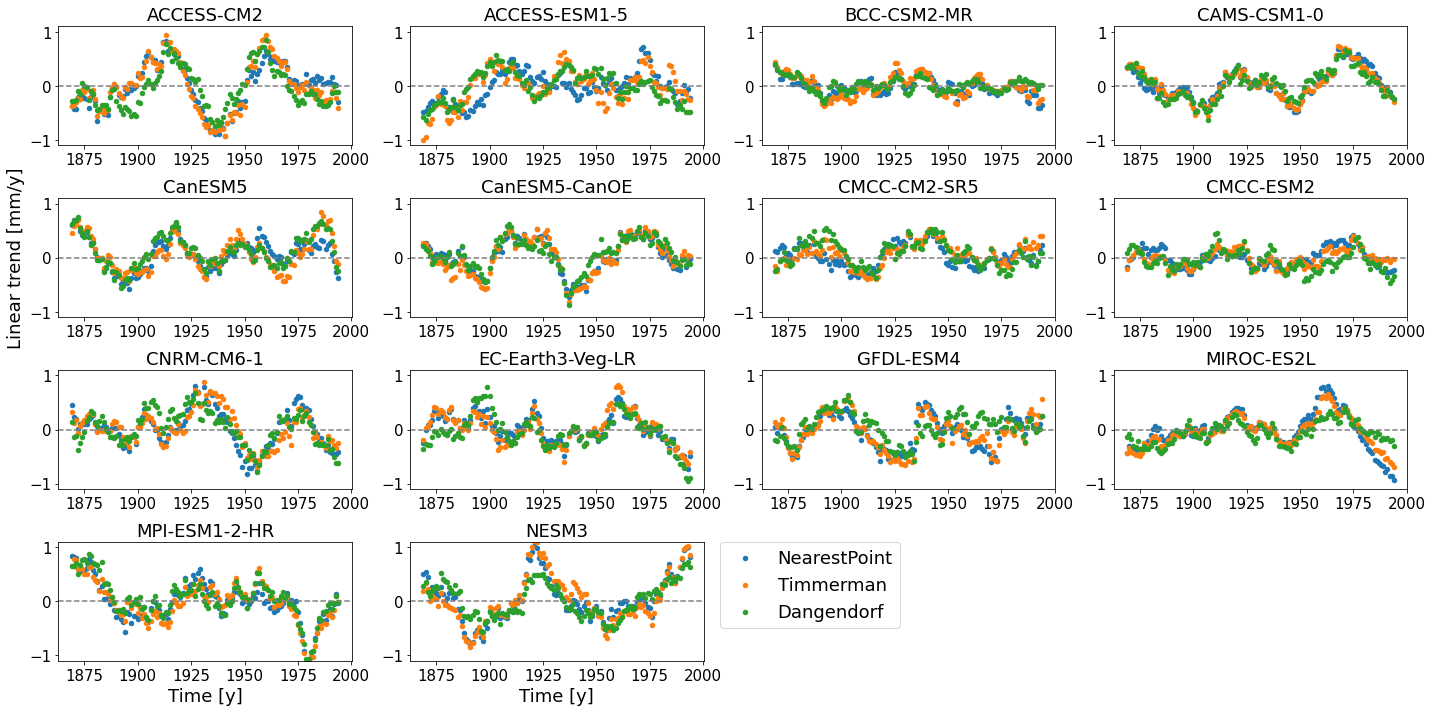

In [32]:
import math
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
fsize = 18
time_period = 39
n_col = 4
n_row = math.ceil(len(best_models) / n_col)
n_delete = len(best_models) % n_col


fig, axs = plt.subplots(n_row, n_col, figsize=(20, 10))


for i in range(n_row):

    for j in range(n_col):
            
            
        ax = axs[i,j]

        if i == n_row-1 and j in range(n_delete, n_col):
            fig.delaxes(axs[i,j])
            
        else:
            
            for wm in labels_windmodel:
                years, trends, std =  get_decadal_trends_stds(timeseries[best_models[n_row*i+j], wm], time_period)
                if i == 0 and j ==0:
                    ax.scatter(years, trends, marker = 'o', s = 20, label = wm)
                else:
                    ax.scatter(years, trends, marker = 'o', s = 20)
            ax.set_title(best_models[n_row*i+j], fontsize = fsize)
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.set_ylim(-1.1,1.1)
            if i == n_row-1:
                ax.set_xlabel('Time [y]', fontsize = fsize)
            if j == 0 and i == 1:
                ax.set_ylabel('Linear trend [mm/y]', fontsize = fsize)
            ax.axhline(color='grey', linestyle='--')
            plt.tight_layout()
                
plt.legend(labels = labels_windmodel, loc='lower right', bbox_to_anchor = (1.7,0.2), fontsize = fsize)
            
            
            
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/model selection/linear_trends_best_models', 
            bbox_inches = 'tight', dpi = 500)